In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np
import datetime as dt
from scipy import stats
import seaborn as sns

In [2]:
sns.set_theme()

In [3]:
df = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3', 'K4', 'K5'],
                   'A': ['A0', 'A1', 'A2', 'A3', 'A4', 'A5']})
df2 = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3', 'K4', 'K5'],
                    'A1': ['A0', 'A1', 'A1', 'A3', 'A3', 'A3'],
                   's': [1, 2, 2, 3,4, 5]})

In [4]:
df3 = df.set_index('key').join(df2.set_index('key')).reset_index()
#print(df3)

In [5]:
aggregated = df3.groupby(["A1"]).sum().reset_index()
#print(aggregated)

In [6]:
dog_data = pd.read_csv("dog_rates_tweets.csv",parse_dates = True)
#dog_data['created_at'] = pd.to_datetime(dog_data['created_at']).dt.to_period('M')
dog_data['created_at']=dog_data.created_at.astype('datetime64[D]')

#dog_data['month_year'] = dog_data['created_at'].dt.to_period('M')
#dog_data['timestamp'] = dog_data['created_at'].apply(to_timestamp)

In [7]:
dog_data['rating'] = dog_data['text'].str.extract(r'([1-9]+\.?\d?|[0])/10')
#dog_data['rating'] = dog_data['text'].str.extract(r'(\d+\.?\d?|[0])/10')

In [8]:
valid = dog_data.dropna()

In [9]:
final_valid = valid.loc[(valid['rating'].astype(float) >= 0) & (valid['rating'].astype(float)  <= 25)]
#final_valid['rating'].astype(float)
final_valid = final_valid.sort_values(['rating'],ascending=False)

In [10]:
#print(final_valid)

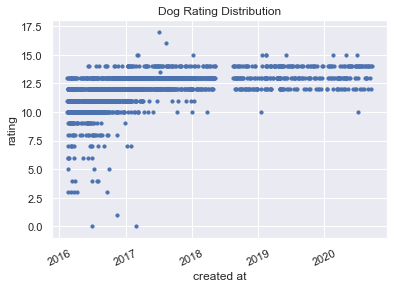

In [11]:
plt.scatter(final_valid['created_at'], final_valid['rating'].astype(float), marker='o', s=10);
plt.xticks(rotation=25)
plt.ylim([-1,18])
plt.title('Dog Rating Distribution')
plt.xlabel('created at') 
plt.ylabel('rating') 
plt.show()

In [12]:
final_valid['timestamp'] = final_valid.created_at.values.astype(np.int64) 
final_valid.to_csv('test3.csv')
#print(final_valid['timestamp'])

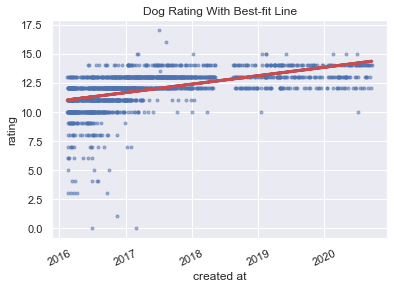

In [24]:
slope, intercept, r_value, p_value, std_err = stats.linregress(final_valid['timestamp'],final_valid['rating'].astype(float))
#print(slope,intercept)
plt.xticks(rotation=25)
plt.plot(final_valid['created_at'], final_valid['rating'].astype(float), 'b.', alpha=0.5)
plt.plot(final_valid['created_at'], final_valid['timestamp']*slope+intercept, 'r-', linewidth=3)
plt.title('Dog Rating With Best-fit Line')
plt.xlabel('created at') 
plt.ylabel('rating') 
plt.show()

In [14]:
print("Slope:", slope)
print("Intercept:",intercept)
#print(final_valid)

Slope: 2.2963292580392368e-17
Intercept: -22.412644613237454


In [15]:
final_valid['prediction'] = final_valid['timestamp']*slope+intercept
final_valid.sort_values(['prediction'],ascending=False);


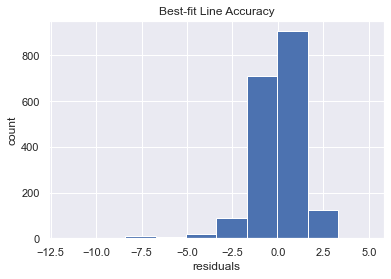

normal test p value:  1.8745031728648554e-211
p value:  5.185566745565183e-121
Slope different from zero
r value:  0.5040754521979214


In [16]:
residuals = final_valid['rating'].astype(float)-(final_valid['timestamp'].astype(float)*slope+intercept)
plt.hist(residuals)
plt.title('Best-fit Line Accuracy')
plt.xlabel('residuals') 
plt.ylabel('count') 

plt.show()
print("normal test p value: ",stats.normaltest(residuals).pvalue)
print("p value: ", p_value)
print("Slope different from zero")
print("r value: ", r_value)

In [17]:
final_valid['rating']= final_valid['rating'].astype(float)
final_valid

,id,created_at,text,rating,timestamp,prediction
5704,705223444686888960,2016-03-03,This is Bode. He's a heavy sleeper. 9/10 https...,9.0,1456963200000000000,11.044028
5037,746369468511756288,2016-06-24,This is an Iraqi Speed Kangaroo. It is not a d...,9.0,1466726400000000000,11.268223
5053,744995568523612160,2016-06-20,This is Abby. She got her face stuck in a glas...,9.0,1466380800000000000,11.260287
5611,709519240576036864,2016-03-14,This is Vince. He's a Gregorian Flapjeck. Whit...,9.0,1457913600000000000,11.065852
5732,703356393781329922,2016-02-26,This is Socks. That water pup w the super legs...,9.0,1456444800000000000,11.032123
...,...,...,...,...,...,...
5234,728751179681943552,2016-05-07,This is Flurpson. He can't believe it's not bu...,10.0,1462579200000000000,11.172989
5231,729113531270991872,2016-05-08,"""Challenge accepted""\n10/10 https://t.co/vNjvr...",10.0,1462665600000000000,11.174974
4177,798576900688019456,2016-11-15,RT @dog_rates: Not familiar with this breed. N...,1.0,1479168000000000000,11.553923
3302,835152434251116546,2017-02-24,When you're so blinded by your systematic plag...,0.0,1487894400000000000,11.754310


In [18]:
final_count = final_valid.groupby(final_valid.created_at.dt.year)['rating'].apply(lambda x: x[x <10].count())

In [19]:
final_count
df = pd.DataFrame(data=final_count)
df = df.reset_index()

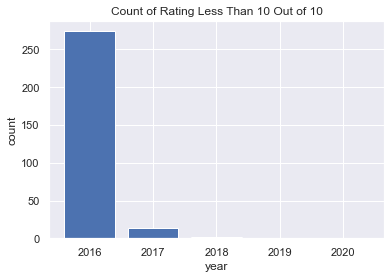

In [23]:
#final_valid
#lower = final_valid.loc[final_valid['rating'] < 10]

#final_count = lower.groupby(['created_at']).size().reset_index(name='count')

plt.bar(df['created_at'],df['rating'])
plt.title('Count of Rating Less Than 10 Out of 10')
plt.xlabel('year') 
plt.ylabel('count') 
plt.show()